In [1]:
!pip install openai
!pip install openai==0.28


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\epqps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\epqps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import openai
# api키 입력
# 사용할때마다 요금이 부과되서 비워놨습니다.
openai.api_key = ''

# 사용자 정보 입력
# db에서 꺼내와야됨
user_info = {
    'age': 24,
    'languageLevel': '초급',
    'languageGoals': '조음 발달 장애 치료, 문장 구성 능력 향상',
    'interests': '만화',
    'accuracy' : '60%',
    'feedback' : '아이의 어휘 문법이 부족한거 같아요'
}

# 프롬프트 설정
# 계속 수정해야 될 것 같습니다.
prompt = f"""
  사용자 정보:
  - 연령: {user_info['age']}개월
  - 언어 발달 수준: {user_info['languageLevel']}
  - 주요 언어 목표: {user_info['languageGoals']}
  - 관심 분야: {user_info['interests']}
  - 직전 정답률: {user_info['accuracy']}
  - 부모 피드백: {user_info['feedback']}

  
  API 요청:
  1. 사용자 정보에 기반 언어 발달 장애 조기 진단을 위한 P-FA, PPVT, REEL-R 기반의 언어발달지연 진단 테스트 문항을 5문제 생성해줘

    다음은 예시의 규칙이야
      1. 문법은 꼭지켜줘!
      2. 선택지가 명확해야 돼 (질문의 오답과 정답이 명확해야 돼)
      3. 선택지는 3개로 제한해줘!
      4. 사용자의 연령에 맞게 문제를 이해하기 쉽게 만들어줘.
      5. 관심 분야 쪽으로 문제를 생성해줘!

  2. 문제 정답률을 바탕으로 부족한 부분을 분석해 주고 이에 맞는 언어 발달 수준 판단해줘

  3. 부모의 피드백을 중점적으로 맞춰서 답변해줘
  
  다음은 우수 대답 예시야. 비슷하게 생성해줘.
    1. **문제 1:** 만화에서 친구가 웃고 있어요. 친구는 무엇을 하고 있나요?
    - A) 물 마시고 있어요.
    - B) 웃고 있어요.
    - C) 자고 있어요.
    - **정답:** B) 웃고 있어요.

    2. **문제 2:** 만화 캐릭터가 사과를 들고 있습니다. 사과는 어떤 색이에요?
      - A) 파란색이에요.
      - B) 빨간색이에요.
      - C) 노란색이에요.
      - **정답:** B) 빨간색이에요.

    3. **문제 3:** 만화에서는 강아지가 뛰어다니고 있어요. 강아지가 어떤 소리를 낼까요?
      - A) 멍멍!
      - B) 야옹!
      - C) 삐약삐약!
      - **정답:** A) 멍멍!

    4. **문제 4:** 만화 속 친구들이 공원에서 놀고 있어요. 친구는 어떤 장난감을 가지고 놀까요?
      - A) 공에요.
      - B) 나무에요.
      - C) 책이에요.
      - **정답:** A) 공에요.
  ...
  2. **문장 구성 연습:** 아이가 자주 사용하는 표현을 문장으로 만들어보도록 유도하기. 예를 들어, "나는 사과를 먹어요."와 같이 간단한 문장부터 시작하기.
  3. **놀이 활동 연계:** 만화 캐릭터에 대한 역할놀이를 통해 언어 사용을 연습하도록 하여, 자연스럽게 문맥 속 어휘를 습득할 수 있도록 지원하기.
"""

# OpenAI API 호출
# system 에게 역할 부여
response = openai.ChatCompletion.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a friendly and helpful Child Language Development Disorder Therapist."},
        {"role": "user", "content": prompt}
    ]
)


In [11]:
# 응답 출력
print(response.choices[0].message.content)


### 언어 발달 지연 진단 테스트 문항

1. **문제 1:** 만화에서 곰이 나무에 올라가고 있어요. 곰은 무엇을 하고 있나요?
   - A) 나무를 자르고 있어요.
   - B) 나무에 올라가고 있어요.
   - C) 나무 밑에서 놀고 있어요.
   - **정답:** B) 나무에 올라가고 있어요.

2. **문제 2:** 만화 주인공이 자전거를 타고 있어요. 자전거는 뭐에요?
   - A) 차에요.
   - B) 수영복이에요.
   - C) 탈 것이에요.
   - **정답:** C) 탈 것이에요.

3. **문제 3:** 만화에서 고양이가 우유를 마시고 있어요. 고양이가 마시는 것은 무엇인가요?
   - A) 운동화에요.
   - B) 우유에요.
   - C) 그림이에요.
   - **정답:** B) 우유에요.

4. **문제 4:** 만화 속 친구들이 함께 놀고 있어요. 친구들은 무엇을 하고 있나요?
   - A) 노래를 부르고 있어요.
   - B) 식사를 하고 있어요.
   - C) 게임을 하고 있어요.
   - **정답:** C) 게임을 하고 있어요.

5. **문제 5:** 만화에서 공룡이 하늘을 보고 있어요. 공룡은 무엇을 하고 있나요?
   - A) 하늘을 보고 있어요.
   - B) 땅을 파고 있어요.
   - C) 길을 걷고 있어요.
   - **정답:** A) 하늘을 보고 있어요.

---

### 분석 및 언어 발달 수준 판단

부모님의 피드백에 따르면 아이의 어휘 및 문법이 부족하다고 하셨습니다. 이 테스트 문제에서 아이가 모든 질문에서 높은 정답률을 보인다면 의미 있는 어휘를 이해하고 사용할 수 있다는 것을 의미하지만, 낮은 정답률이 나타난다면 언어 발달에 지연이 있을 수 있습니다. 

제공된 문제들은 아동의 흥미를 자극하면서도 기본적인 어휘와 간단한 문장 구조를 요구합니다. 만약 아이가 정답률이 낮거나 연관된 표현을 사용하지 않는 경우, 어휘와 문법에서의 부족함을 더욱 강조할 필요가 있습니다.

---

### 제안 사항

1. 

In [7]:
!pip install pillow

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 217.9 kB/s eta 0:00:12
    --------------------------------------- 0.0/2.6 MB 245.8 kB/s eta 0:00:11
    --------------------------------------- 0.1/2.6 MB 272.3 kB/s eta 0:00:10
   - -------------------------------------- 0.1/2.6 MB 374.1 kB/s eta 0:00:07
   -------------------- ------------------- 1.3/2.6 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 7.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\epqps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Combined image saved as combined_comic.png


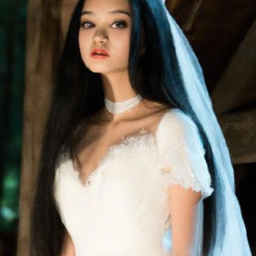

In [12]:
import openai
from PIL import Image
import requests
from io import BytesIO

# 프롬프트

prompt_webtoon = response.choices[0].message.content

# 이미지 생성 및 다운로드(DALL-E사용)
response_webtoon = openai.Image.create(
    prompt= prompt_webtoon[:1000], #길이 제한 있어서 1000까지 슬라이싱 해줬습니다.
    n=1,
    size="256x256"
)
image_url = response_webtoon['data'][0]['url']
image_response = requests.get(image_url)
img = Image.open(BytesIO(image_response.content))

# 결과물 저장
img.save('combined_comic.png')
print("Combined image saved as combined_comic.png")
img



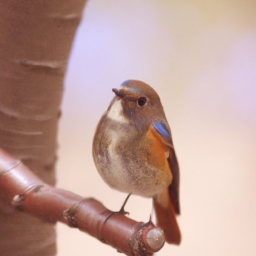